# Olivetti faces classification with K-Means Clustering
### Author: Young Park / 301200413

In [1]:
#Retrieve and load the Olivetti faces dataset [5 points]

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

print(dir(olivetti))

['DESCR', 'data', 'images', 'target']


In [2]:
data = olivetti.data
target = olivetti.target

print(data.shape)
print(target.shape)


(400, 4096)
(400,)


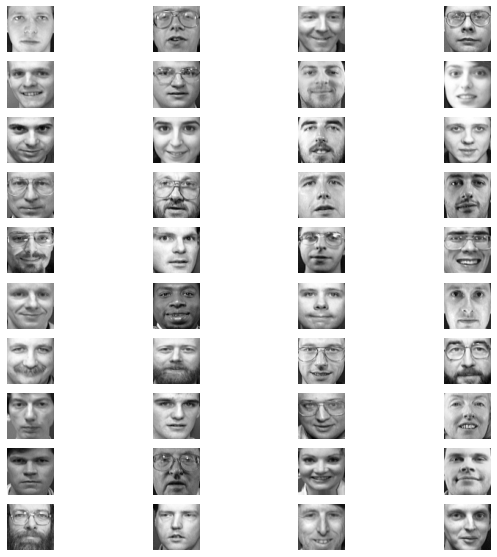

In [3]:
# Print target faces

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(data[10*i].reshape(64, 64), cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
# Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=13, stratify=target)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(256, 4096)
(64, 4096)
(80, 4096)


In [5]:
# Train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. [30 points]

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(knn.score(X_val, y_val))



0.9375


For n_clusters = 2 The average silhouette_score is : 0.14840062
For n_clusters = 3 The average silhouette_score is : 0.119654804
For n_clusters = 4 The average silhouette_score is : 0.104515776
For n_clusters = 5 The average silhouette_score is : 0.10306216
For n_clusters = 6 The average silhouette_score is : 0.09510702
For n_clusters = 7 The average silhouette_score is : 0.086435184
For n_clusters = 8 The average silhouette_score is : 0.08630936
For n_clusters = 9 The average silhouette_score is : 0.08390071
For n_clusters = 10 The average silhouette_score is : 0.08689679


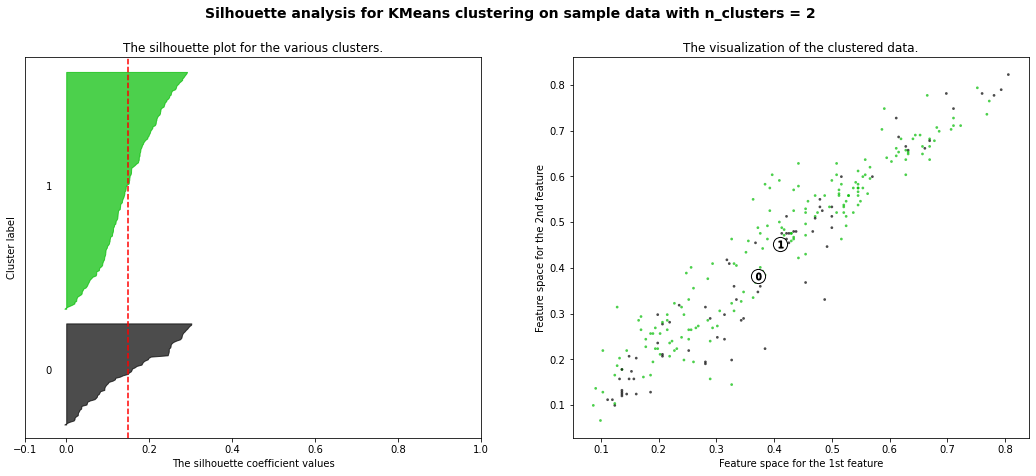

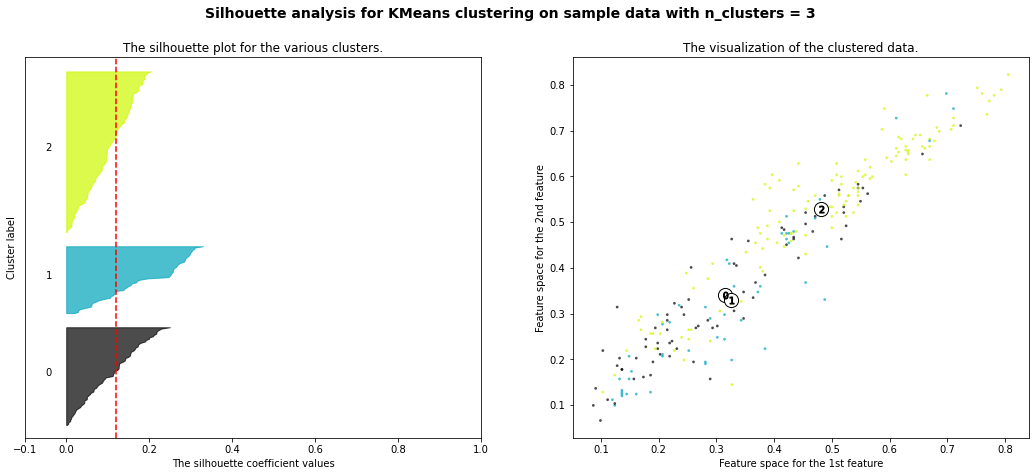

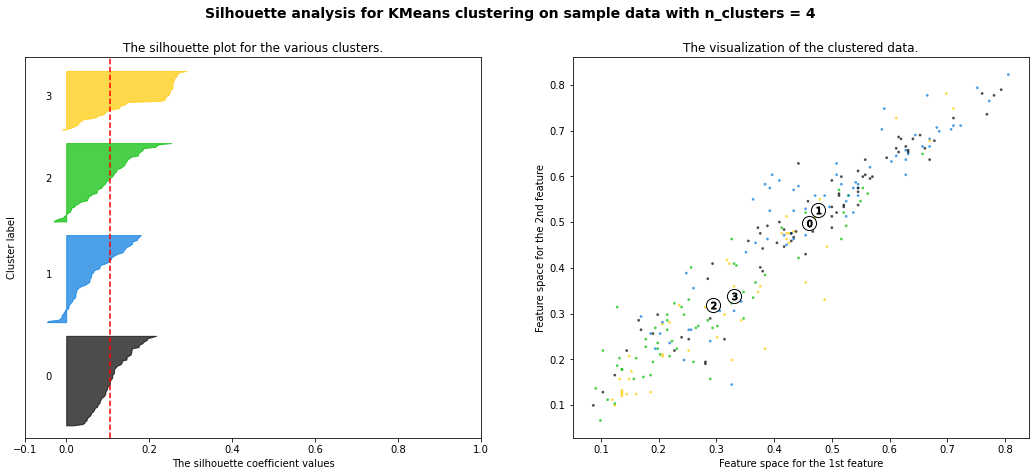

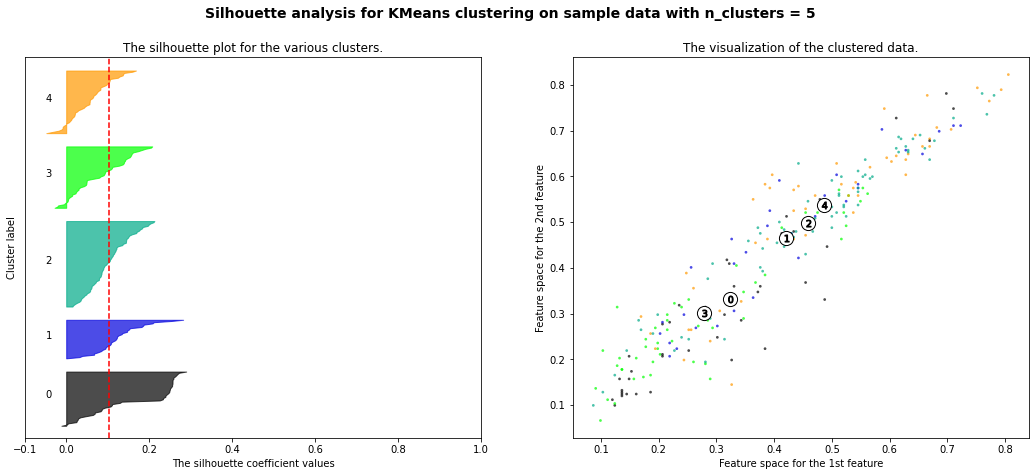

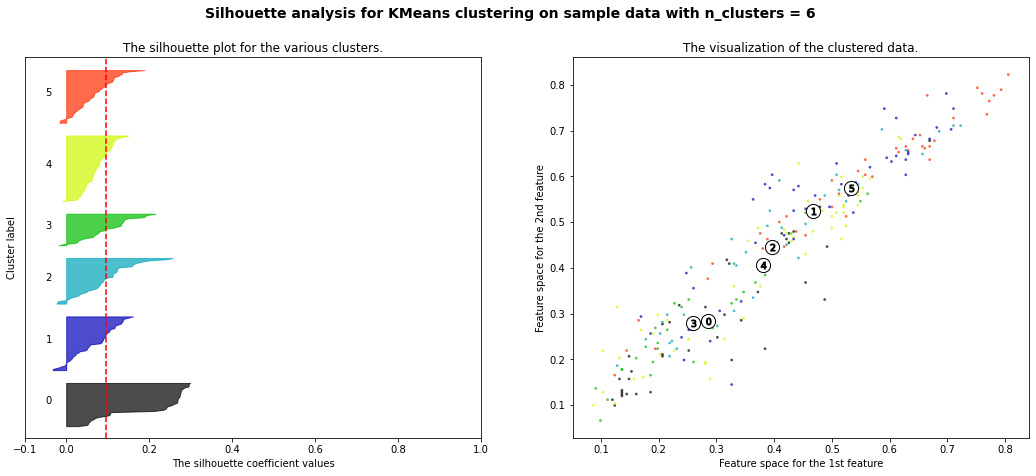

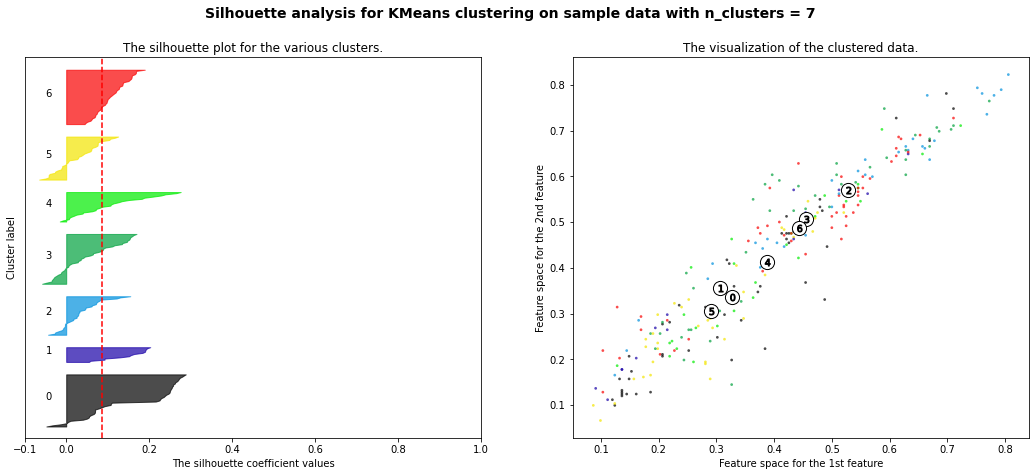

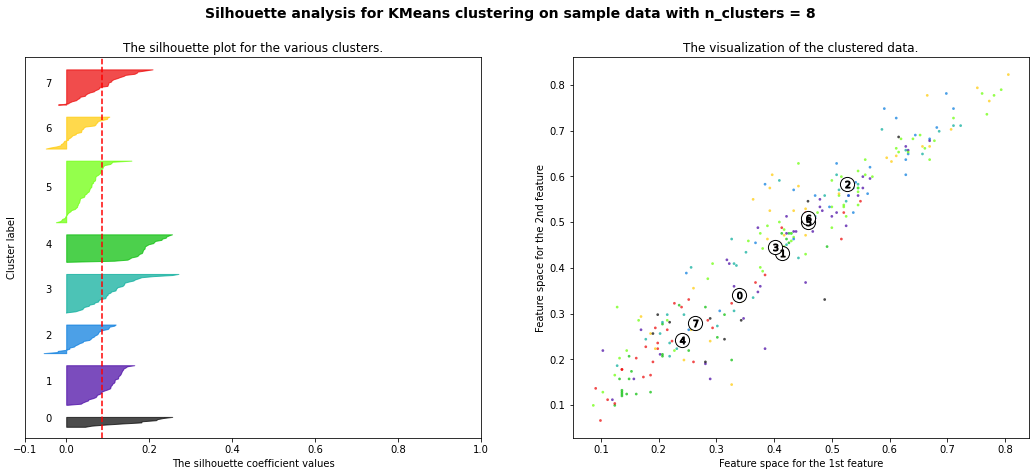

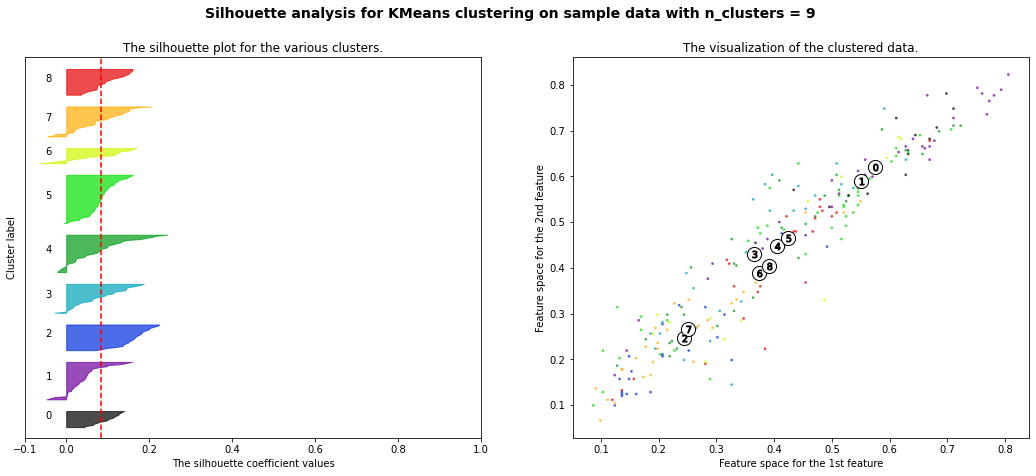

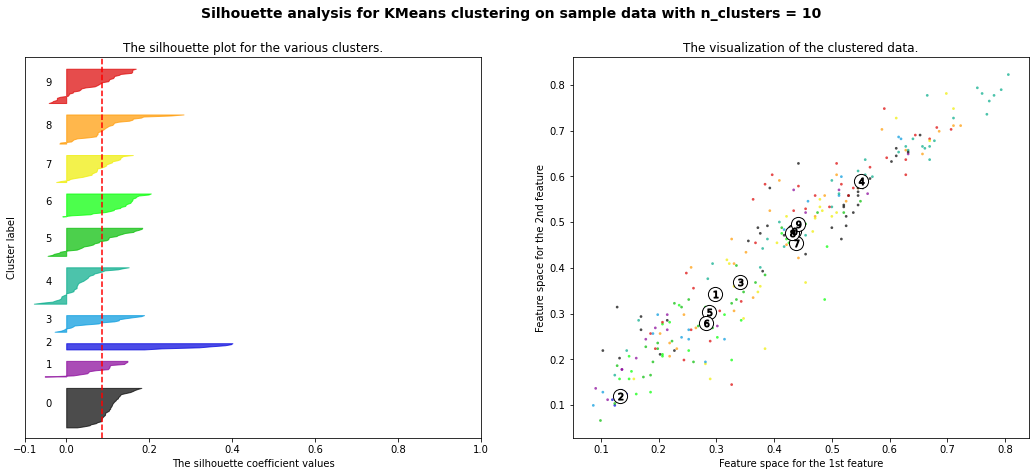

In [6]:
# Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters. [25 points]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from matplotlib import cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=13)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

plt.show()


The silhouette score is highest at n_cluster=2.

In [8]:
# Use the set from (4) to train a classifier as in (3) using k-fold cross validation. [30 points]
# n_clusters = 2

from sklearn.model_selection import cross_val_score

kmeans = KMeans(n_clusters=2, random_state=13)
kmeans.fit(X_train)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

# k-fold cross validation with stratification
knn = KNeighborsClassifier(n_neighbors=3)   
scores = cross_val_score(knn, X_train_kmeans, y_train, cv=5)
print(scores)
print(scores.mean())

# test
knn.fit(X_train_kmeans, y_train)
print(knn.score(X_test_kmeans, y_test))



[0.17307692 0.15686275 0.2745098  0.21568627 0.17647059]
0.1993212669683258
0.25


In [9]:
# n_clusters = 4

kmeans = KMeans(n_clusters=4, random_state=13)
kmeans.fit(X_train)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

# k-fold cross validation with stratification
knn = KNeighborsClassifier(n_neighbors=3)   
scores = cross_val_score(knn, X_train_kmeans, y_train, cv=5)
print(scores)
print(scores.mean())

# test
knn.fit(X_train_kmeans, y_train)
print(knn.score(X_test_kmeans, y_test))

[0.40384615 0.31372549 0.45098039 0.35294118 0.39215686]
0.3827300150829563
0.475


In [10]:
# n_clusters = 9
kmeans = KMeans(n_clusters=9, random_state=13)
kmeans.fit(X_train)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

# k-fold cross validation with stratification
knn = KNeighborsClassifier(n_neighbors=3)   
scores = cross_val_score(knn, X_train_kmeans, y_train, cv=5)
print(scores)
print(scores.mean())

# test
knn.fit(X_train_kmeans, y_train)
print(knn.score(X_test_kmeans, y_test))

[0.48076923 0.43137255 0.50980392 0.43137255 0.41176471]
0.45301659125188537
0.5375
